In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

In [25]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 / 
    # temp = df.loc[df[feature].notnull()]
    sns.barplot(x = feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()

    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

In [26]:

def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])

In [27]:
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    

In [54]:
def numerical_numerical_hitmap(df):
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()

# 이탈고객 여부(범주형) --> 물품 구매량, 구매수량 , 3개월간 방문 횟수(숫자형)
- T-test 검정 (Qty , Amt , Visit_3M_Cnt	,Amt_3M_sum)


In [28]:
# 데이터 불러오기
path = 'C:/Users/User/Desktop/KT Aivle/KT_AIVLE_DX_Regular_course/Week1/DX_미니프로젝트 1차_ 1일차 실습자료/cust_churn.csv' # 변동

check = pd.read_csv(path)

check.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3


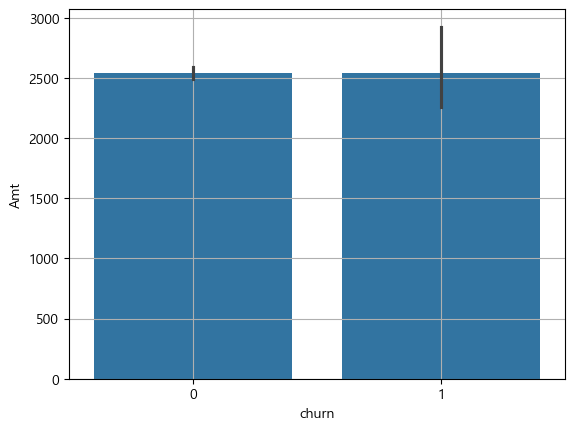

T-test 결과: t-statistic = 0.007207203698252476, p-value = 0.994249744240399


In [29]:
categorical_numerical(check , 'churn' ,'Amt') # 이탈고객과 유지고객의 구매금액에는 큰 관계가 없음

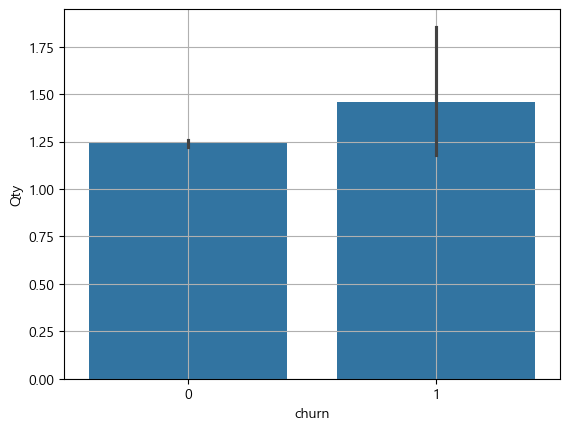

T-test 결과: t-statistic = -3.0754021222673704, p-value = 0.0021105176824918305


In [30]:
categorical_numerical(check , 'churn' ,'Qty') # 하지만 구매 수량에는 분명한 차이가 발생
# 이탈고객이 평균적으로 구매하는 양이 더 많은데 이탈한 것으로 보아 
# 대량구매 혜택이 마음에 들지 않는다던지 배송 서비스가 별로라서 이탈했음?

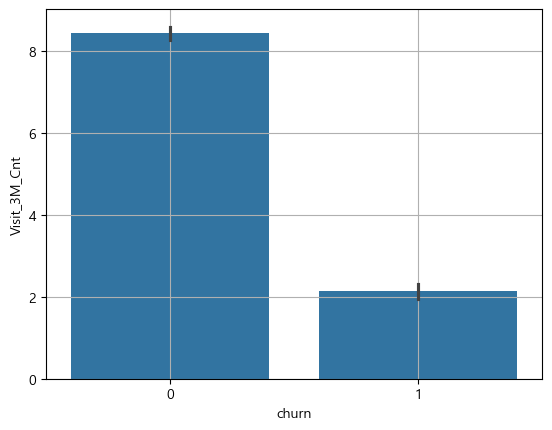

T-test 결과: t-statistic = 28.40125258752731, p-value = 8.542287306041404e-168


,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3


In [31]:
check['Visit_3M_Cnt'] = check['Visit_3M_Cnt'].fillna(0)
categorical_numerical(check , 'churn' ,'Visit_3M_Cnt') # 2016-09 ~2016-12 동안 방문한 횟수  / 
# 이탈고객은 최근 3개월간 방문 횟수가 현저히 적음 
check.head()


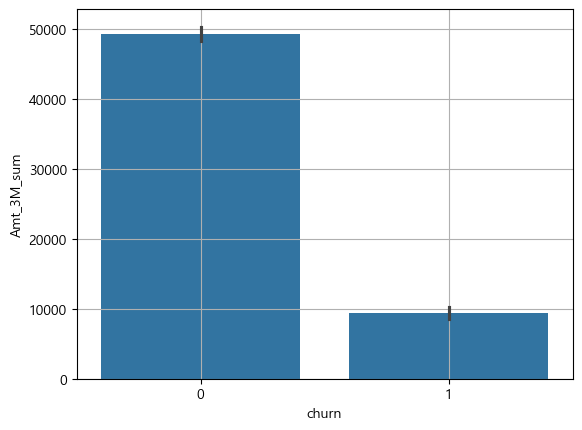

T-test 결과: t-statistic = 26.989118880936413, p-value = 1.6474131086130713e-152


In [32]:
check['Amt_3M_sum'] = check['Amt_3M_sum'].fillna(0)
categorical_numerical(check , 'churn' ,'Amt_3M_sum') # 2016-09 ~2016-12 동안 구매한 금액  / 
# 이탈고객은 최근 3개월간 구매량이 매우 적음 

# 범주형 --> 범주형( 카이제곱 검정 )   churn ->  
- Gender	Addr1	Addr2	AgeGroup		RegDuration	
- Generation	
- GeneLE

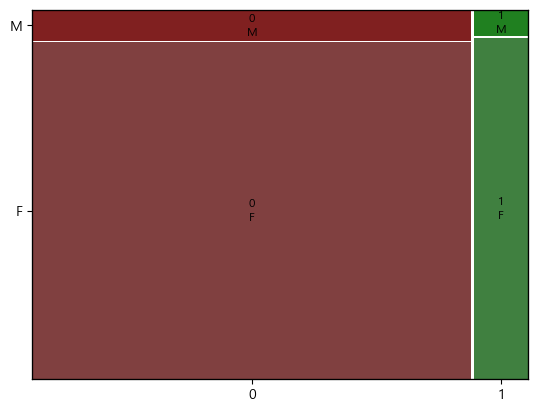

교차표
 churn      0    1
Gender           
F       5538  703
M        519   55
카이제곱통계량 1.339612152360461
p-value 0.24710237749942376
자유도 1


In [33]:
categorical_categorical(check ,'churn','Gender')
# 성별은 이탈율에 영향을 주지 않음 

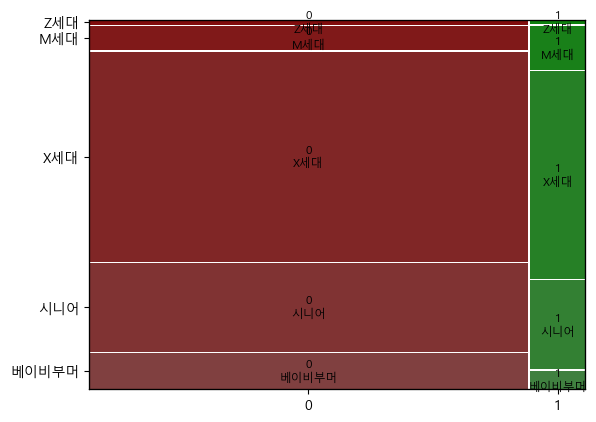

교차표
 churn          0    1
Generation           
M세대          407   92
X세대         3487  432
Z세대           84   10
베이비부머        598   39
시니어         1481  185
카이제곱통계량 43.177803715458296
p-value 9.50504487035504e-09
자유도 4


In [34]:
categorical_categorical(check ,'churn','Generation')
# 세대별 로 이탈자 비율을 보면 밀레니엄 세대의 이탈 비율이 높음 

# 숫자형 -> 숫자형 검정 (상관분석)

- Age -> Amt 

In [16]:
check.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3


c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


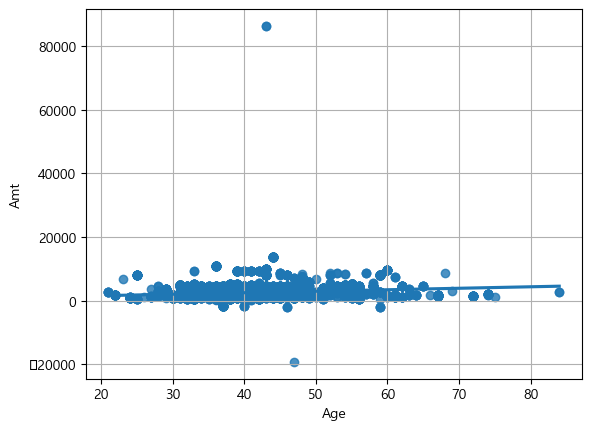

상관계수 : 0.14977096159244208, p-value : 1.7529399467461226e-35


In [35]:
numerical_numerical(check, 'Age','Amt')

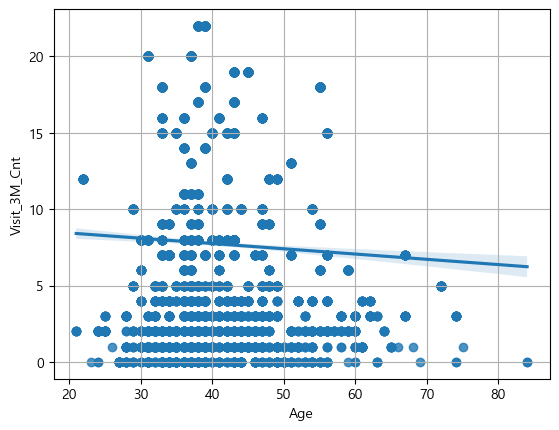

상관계수 : -0.046029413622845405, p-value : 0.0001440060568483712


In [36]:
numerical_numerical(check, 'Age','Visit_3M_Cnt')

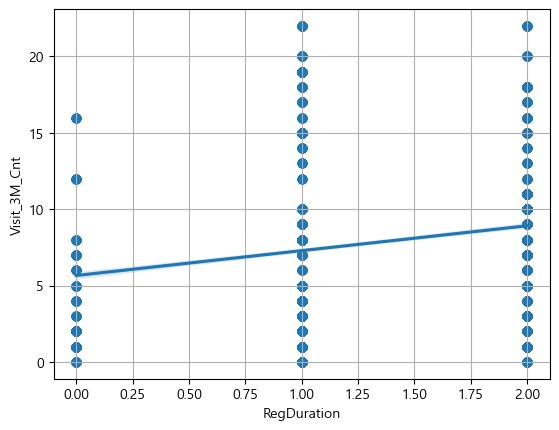

상관계수 : 0.18331734835530003, p-value : 1.4101089736120705e-52


In [37]:
numerical_numerical(check, 'RegDuration','Visit_3M_Cnt')

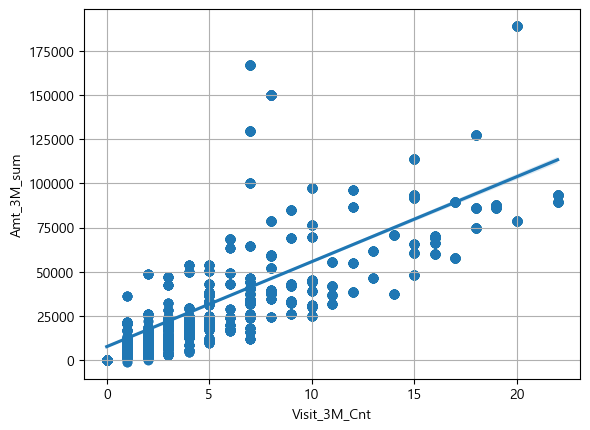

상관계수 : 0.7262101916713114, p-value : 0.0


In [38]:
numerical_numerical(check, 'Visit_3M_Cnt','Amt_3M_sum')

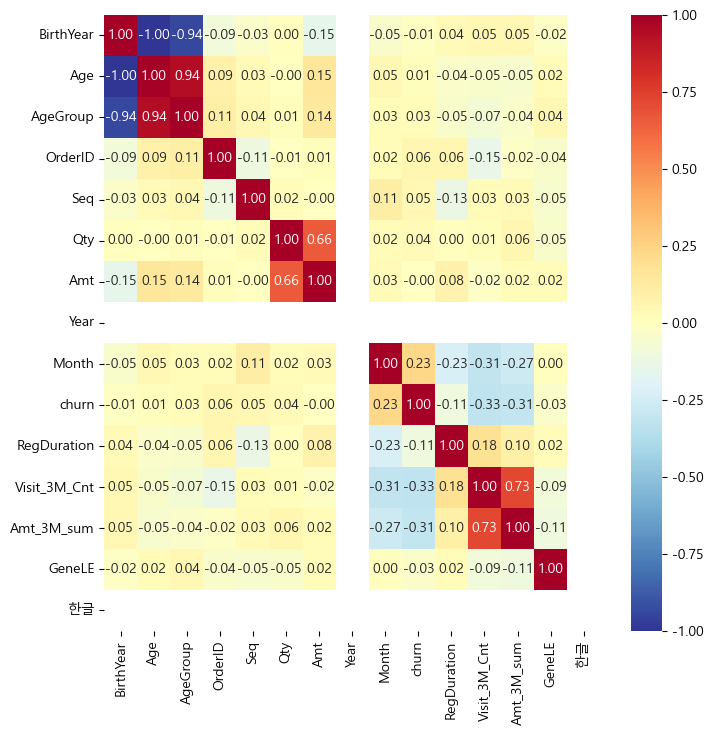

In [55]:
#check['한글'] = 1
numerical_numerical_hitmap(check)